In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data-files/seoul-temperature.csv')

In [4]:
df.info() # 데이터프레임에 저당된 데이터 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42455 entries, 0 to 42454
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42455 non-null  object 
 1   지점       42455 non-null  int64  
 2   평균기온(℃)  41699 non-null  float64
 3   최저기온(℃)  41696 non-null  float64
 4   최고기온(℃)  41696 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [7]:
df.shape # 행, 열의 정보

(42455, 5)

In [5]:
df.head() # 앞 부분의 데이터 반환

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [6]:
df.tail() # 뒷 부분의 데이터 반환

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
42450,\t2025-02-24,108,-1.3,-6.3,4.7
42451,\t2025-02-25,108,2.1,-3.1,6.1
42452,\t2025-02-26,108,3.7,0.7,9.1
42453,\t2025-02-27,108,5.8,-2.0,14.2
42454,\t2025-02-28,108,7.8,3.7,13.7


In [10]:
np.array([1, 2, 3]) > 1

array([False,  True,  True])

In [ ]:
# 가장 더웠던 날 조회
max_temp = df['최고기온(℃)'].max()
mask = df['최고기온(℃)'] == max_temp
df[mask]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
40051,\t2018-08-01,108,33.6,27.8,39.6


In [14]:
# 서울이 가장 추웠던 날의 데이터 조회
min_temp = df['최저기온(℃)'].min()
mask = df['최저기온(℃)'] == min_temp
df[mask]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7396,\t1927-12-31,108,-15.3,-23.1,-6.4


In [15]:
# 관측 기간 전체 평균기온의 평균
df['평균기온(℃)'].mean()

np.float64(11.802949711024246)

In [17]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [ ]:
# 날짜 컬럼의 데이터에서 \t 제거
# df['날짜'] = df['날짜'].str.replace('\t', '') # 날짜 컬럼의 모든 데이터에 replace함수를 반복 적용
df['날짜2'] = df['날짜'].str.replace('\t', '')  # 날짜 컬럼의 모든 데이터에 replace함수를 반복 적용
df['날짜3'] = df['날짜2'].str.slice(-5)         # 날짜2 컬럼의 모든 데이터에 slice함수를 반복 적용
mask = df['날짜3'] == '08-15' # 날짜3이 '08-15'이면 True 아니면 False
avg_temps = df[mask]['평균기온(℃)']
date_list = df[mask]['날짜2'].str.slice(0, 4)
avg_temps[:5], date_list[:5]

In [37]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),날짜2,날짜3
0,\t1907-10-01,108,13.5,7.9,20.7,1907-10-01,10-01
1,\t1907-10-02,108,16.2,7.9,22.0,1907-10-02,10-02
2,\t1907-10-03,108,16.2,13.1,21.3,1907-10-03,10-03
3,\t1907-10-04,108,16.5,11.2,22.0,1907-10-04,10-04
4,\t1907-10-05,108,17.6,10.9,25.4,1907-10-05,10-05


In [ ]:
# 날짜 컬럼의 데이터에서 \t 제거
df['날짜2'] = df.iloc[:, 0].str.replace('\t', '')  # 날짜 컬럼의 모든 데이터에 replace함수를 반복 적용
df['날짜3'] = df.iloc[:, 5].str.slice(-5)         # 날짜2 컬럼의 모든 데이터에 slice함수를 반복 적용
mask = df['날짜3'] == '08-15' # 날짜3이 '08-15'이면 True 아니면 False
avg_temps = df[mask]['평균기온(℃)']
date_list = df[mask]['날짜2'].str.slice(0, 4)
avg_temps[:5], date_list[:5]

(319     25.5
 684     22.5
 1049    21.9
 1414    25.7
 1780    24.8
 Name: 평균기온(℃), dtype: float64,
 319     1908
 684     1909
 1049    1910
 1414    1911
 1780    1912
 Name: 날짜2, dtype: object)

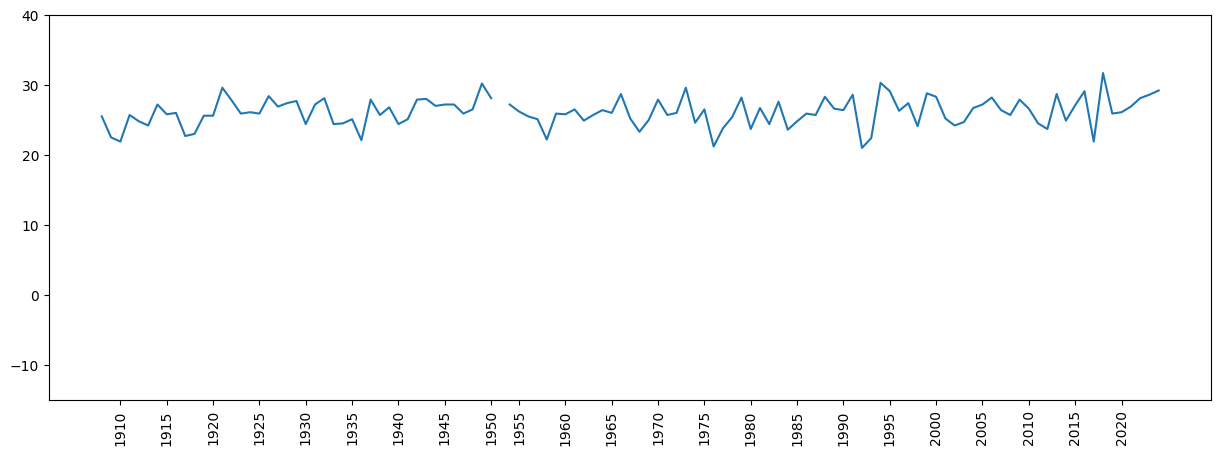

In [35]:
plt.figure(figsize=(15, 5)) # 그래프의 표시 영역 크기 설정
plt.plot(date_list, avg_temps)
plt.ylim(-15, 40)
xticks = [d for d in date_list if int(d) % 5 == 0] # 매 5년
plt.xticks(xticks, rotation=90)
plt.show()